In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
#import statsmodels.formula.api as smf
import statsmodels as smf

%matplotlib inline
plt.style.use('seaborn-white')

pd.set_option('display.max_columns',100)

In [2]:
# Setup  - To support both python 2 and python 3
# First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, 
# ensure MatplotLib plots figures inline and prepare a function to save the figures:

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Import dataset

In [3]:
df = pd.read_csv('/Users/Jai/Documents/GitHub/Machine_learning/Of Trees & Forests Bagging, Boosting, Random Forests, and Ensembles/data.csv')

In [4]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

Check datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [119]:
df.describe()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115

Check for missing Values

In [6]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [7]:
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

#no missing values in the data

Total number of rows with missing values is  0
since it is only 0 percent of the entire dataset the rows with missing values are excluded.


Rename target variable Bankrupt? to Bankrupt

In [8]:
df.rename(columns={'Bankrupt?': 'Bankrupt'}, inplace=True)


Exploratory Analysis

In [9]:
#Count of unique values in target variable
df.Bankrupt.value_counts()

0    6599
1     220
Name: Bankrupt, dtype: int64

<AxesSubplot:xlabel='Bankrupt', ylabel='count'>

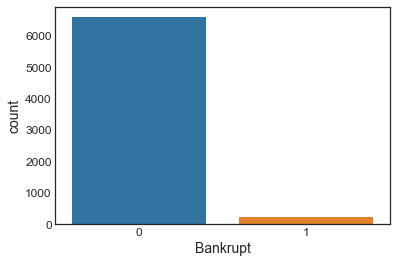

In [10]:
import seaborn as sn
sn.countplot(x='Bankrupt',data=df)

### Define independent and target variables

In [136]:
#independent variables
target = "Bankrupt"
X = df.drop(columns=target)

print("X shape:", X.shape)


X shape: (6819, 95)


In [137]:
#Target variable
y = df[target]
print(y.value_counts())
print(y.value_counts(normalize=True))
print("y shape:", y.shape)

0    6599
1     220
Name: Bankrupt, dtype: int64
0    0.967737
1    0.032263
Name: Bankrupt, dtype: float64
y shape: (6819,)


In [138]:
import numpy as np
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [139]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (5455, 95)
Training Labels Shape: (5455,)
Testing Features Shape: (1364, 95)
Testing Labels Shape: (1364,)


Use mutual info classif function to information on how much each feature contributes to the target

Text(0, 0.5, 'Mutual Information')

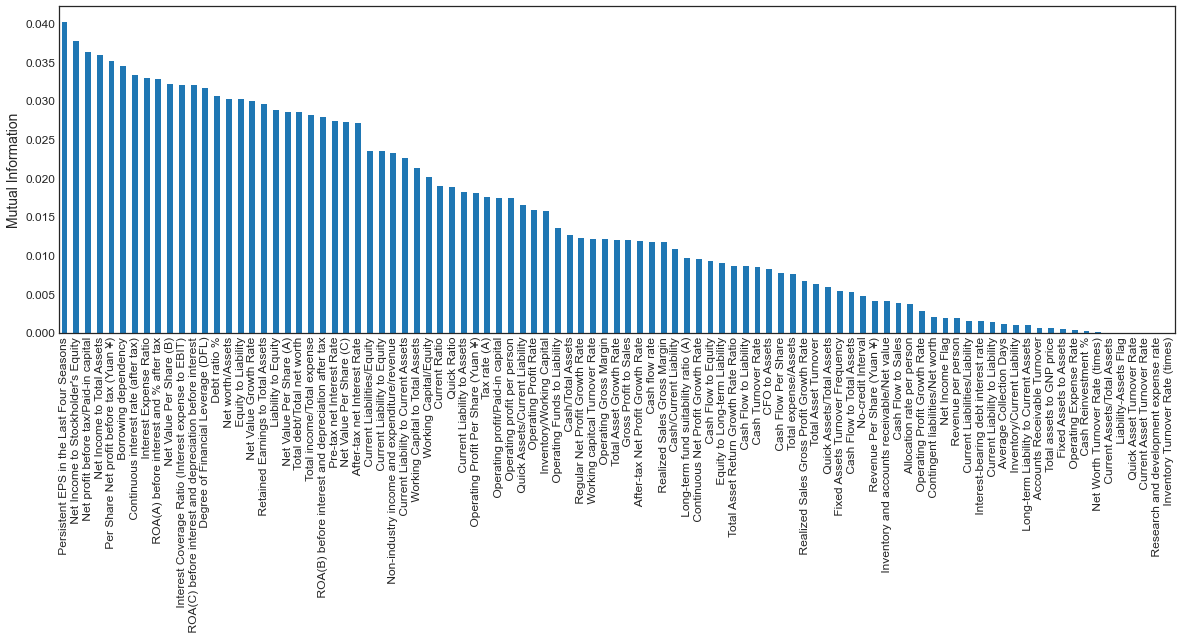

In [140]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

# Random Forest

Perform Gridsearch to get best parameters

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold


# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=42)

# Define the hyperparameter grid for GridSearch
param_grid = {
    'n_estimators': [50, 100, 150],          # Number of trees in the forest
    'criterion': ['gini', 'entropy'],       # Function to measure the quality of a split
    'max_depth': [None, 5, 10, 20],            # Maximum depth of the tree
    #'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    #'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'max_features' : ['auto','sqrt','log2'],
    #'max_leaf_nodes': [5,10,16]
}

# Create the GridSearchCV object with the Random Forest classifier and parameter grid
clf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=cv, n_jobs=-1)

    
%time clf.fit(X_train, y_train)

CPU times: user 4.33 s, sys: 269 ms, total: 4.6 s
Wall time: 6min 50s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=42),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150]})

Best parameters

In [142]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 100}

Get the best Random Forest model from the GridSearchCV

In [143]:
# Get the best Random Forest model from the GridSearchCV
best_rf_model = clf.best_estimator_

Classification Report

In [144]:
#Classification report for test data 
predicted_test = best_rf_model.predict(X_test)
print(classification_report(y_test, predicted_test)) # classification report for test data

#Classification report for train data 
predicted_train = best_rf_model.predict(X_train)
print(classification_report(y_train, predicted_train)) # classification report for train data



              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.64      0.14      0.23        51

    accuracy                           0.96      1364
   macro avg       0.80      0.57      0.60      1364
weighted avg       0.96      0.96      0.95      1364

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5286
           1       1.00      1.00      1.00       169

    accuracy                           1.00      5455
   macro avg       1.00      1.00      1.00      5455
weighted avg       1.00      1.00      1.00      5455



Evaluate the model

In [146]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted_test)
print("Accuracy:", accuracy)

Accuracy: 0.9648093841642229


Confusion Matrix

Text(0.5, 257.44, 'Predicted label Train set')

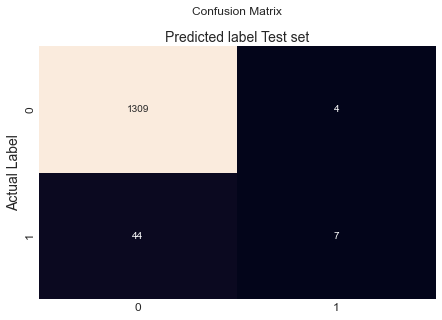

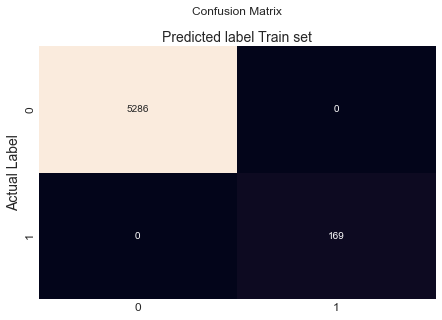

In [147]:
#Plot confusion matrix for test data
import matplotlib.pyplot as plt
import seaborn as sns
import random

test_cnf_matrix = confusion_matrix(y_test, predicted_test) # confusion matrix for test data
train_cnf_matrix = confusion_matrix(y_train, predicted_train) #confusion matrix for train data

labels=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
sns.heatmap(pd.DataFrame(test_cnf_matrix), annot=True,fmt="g", cbar=False)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual Label")
plt.xlabel("Predicted label Test set")

#Plot confusion matrix for train data

labels=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
sns.heatmap(pd.DataFrame(train_cnf_matrix), annot=True,fmt="g", cbar=False)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual Label")
plt.xlabel("Predicted label Train set")

In [148]:
# Accuracy of the positive predictions; this is called the precision of the classifier { TP /[TP+FP]}
# Precision is typically used along with another metric named recall (sensitivity or true positive rate) { TP /[TP+FN]}
from sklearn.metrics import precision_score, recall_score

print("Precision of predictions vs actual on test data is ", round(precision_score(y_test, predicted_test),2)) # test data precision
print("Recall on test data is ", round(recall_score(y_test, predicted_test),2)) # test data recall

print("Precision of predictions vs actual on train data is ", round(precision_score(y_train, predicted_train),2)) #train data precision
print("Recall on train data is ", round(recall_score(y_train, predicted_train),2)) #train data recall

Precision of predictions vs actual on test data is  0.64
Recall on test data is  0.14
Precision of predictions vs actual on train data is  1.0
Recall on train data is  1.0


Roc Curve

In [149]:
# predict probabilities train set
pred_prob_train = best_rf_model.predict_proba(X_train)
pred_prob_test= best_rf_model.predict_proba(X_test)


In [150]:
# To plot the ROC curve, you first use the roc_curve() function to compute the TPR and FPR for various threshold values:

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, pred_prob_train[:,1])
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_prob_test[:,1])


Saving figure roc_curve_plot


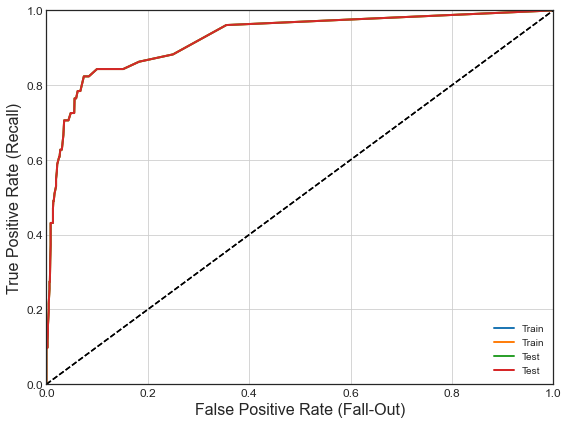

In [151]:
# Then you can plot the FPR against the TPR using Matplotlib
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot(fpr1, tpr1, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.grid(True)            
                                 # Not shown

plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr, tpr,'Train')
plot_roc_curve(fpr1, tpr1,'Test')

#plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") 
#plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  
#plt.plot([4.837e-3], [0.4368], "ro")               
save_fig("roc_curve_plot")                         
plt.legend()  
plt.show()

In [152]:
# tradeoff: the higher the recall (TPR), the more false positives (FPR) the classifier produces. The dotted line represents the 
# ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left 
# corner). One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC
# equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute 
# the ROC AUC

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, pred_prob_train[:,1]))
print(roc_auc_score(y_test, pred_prob_test[:,1]))


1.0
0.9252796320356018


Precision/Recall Curve

In [153]:
#Average precision score
from sklearn.metrics import average_precision_score
average_precision_score(y_test, y_pred_prob)

0.5455975254109822

Feature importance scores

In [163]:
# Get numerical feature importances
importances = list(best_rf_model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

'''
Below features have 0 scores and can be eliminated from next run
Variable:  Tax rate (A)        Importance: 0.0
Variable:  Cash Flow Per Share Importance: 0.0
Variable:  Contingent liabilities/Net worth Importance: 0.0
Variable:  Net Worth Turnover Rate (times) Importance: 0.0
Variable:  Current Assets/Total Assets Importance: 0.0
Variable:  Quick Asset Turnover Rate Importance: 0.0
Variable:  CFO to Assets       Importance: 0.0
Variable:  Liability-Assets Flag Importance: 0.0
Variable:  Net Income Flag     Importance: 0.0
'''

Variable:  Persistent EPS in the Last Four Seasons Importance: 0.03
Variable:  Total debt/Total net worth Importance: 0.03
Variable:  Net Income to Total Assets Importance: 0.03
Variable:  Net Income to Stockholder's Equity Importance: 0.03
Variable:  ROA(A) before interest and % after tax Importance: 0.02
Variable:  After-tax net Interest Rate Importance: 0.02
Variable:  Non-industry income and expenditure/revenue Importance: 0.02
Variable:  Continuous interest rate (after tax) Importance: 0.02
Variable:  Net Value Per Share (B) Importance: 0.02
Variable:  Net Value Per Share (A) Importance: 0.02
Variable:  Net Value Per Share (C) Importance: 0.02
Variable:  Per Share Net profit before tax (Yuan ¥) Importance: 0.02
Variable:  Net Value Growth Rate Importance: 0.02
Variable:  Quick Ratio         Importance: 0.02
Variable:  Debt ratio %        Importance: 0.02
Variable:  Net worth/Assets    Importance: 0.02
Variable:  Borrowing dependency Importance: 0.02
Variable:  Net profit before ta

F1 Score

In [154]:
from sklearn.metrics import f1_score
print(f1_score(y_test, predicted_test)) # f1 score for test 
print(f1_score(y_train, predicted_train)) # f1 score for train

0.22580645161290325
1.0


# Gradient Boosted Trees

Model training using gridsearch to find best hyperparameters

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold


# Create a Random Forest classifier
gbc = GradientBoostingClassifier()

cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=42)

# Define the hyperparameter grid for GridSearch
param_grid = {
    'n_estimators': [50, 100, 150],          # Number of trees in the forest
    'learning_rate' : [0.1, 0.05, 0.01],
    'max_depth': [3,5,7],            # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 1.0]
}

# Create the GridSearchCV object with the GradientBoosting classifier and parameter grid
clf = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=cv, n_jobs=-1)

    
%time clf.fit(X_train, y_train)

CPU times: user 27 s, sys: 1.46 s, total: 28.4 s
Wall time: 7h 1min 39s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=42),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 1.0]})

Best parameters

In [77]:
clf.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 150,
 'subsample': 0.8}

Best estimator

In [78]:
# Get the best Random Forest model from the GridSearchCV
best_gb_model = clf.best_estimator_

Classification Report

In [80]:
#Classification report for test data 
predicted_test = best_gb_model.predict(X_test)
print(classification_report(y_test, predicted_test)) # classification report for test data

#Classification report for train data 
predicted_train = best_gb_model.predict(X_train)
print(classification_report(y_train, predicted_train)) # classification report for train data



              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.86      0.12      0.21        51

    accuracy                           0.97      1364
   macro avg       0.91      0.56      0.59      1364
weighted avg       0.96      0.97      0.95      1364

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5286
           1       0.98      0.27      0.42       169

    accuracy                           0.98      5455
   macro avg       0.98      0.63      0.70      5455
weighted avg       0.98      0.98      0.97      5455



Evaluate the model

In [81]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted_test)
print("Accuracy:", accuracy)

Accuracy: 0.966275659824047


Confusion Matrix

Text(0.5, 257.44, 'Predicted label Train set')

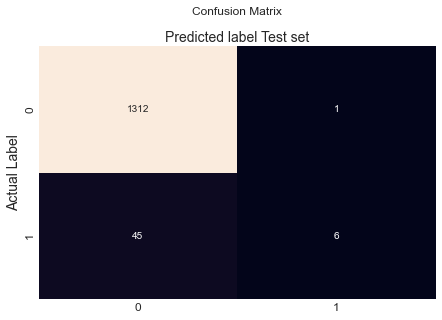

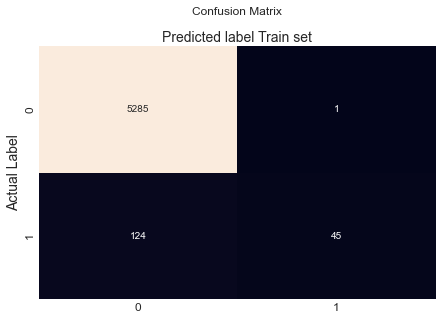

In [82]:
#Plot confusion matrix for test data
import matplotlib.pyplot as plt
import seaborn as sns
import random

test_cnf_matrix = confusion_matrix(y_test, predicted_test) # confusion matrix for test data
train_cnf_matrix = confusion_matrix(y_train, predicted_train) #confusion matrix for train data

labels=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
sns.heatmap(pd.DataFrame(test_cnf_matrix), annot=True,fmt="g", cbar=False)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual Label")
plt.xlabel("Predicted label Test set")

#Plot confusion matrix for train data

labels=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
sns.heatmap(pd.DataFrame(train_cnf_matrix), annot=True,fmt="g", cbar=False)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual Label")
plt.xlabel("Predicted label Train set")

In [83]:
# Accuracy of the positive predictions; this is called the precision of the classifier { TP /[TP+FP]}
# Precision is typically used along with another metric named recall (sensitivity or true positive rate) { TP /[TP+FN]}
from sklearn.metrics import precision_score, recall_score

print("Precision of predictions vs actual on test data is ", round(precision_score(y_test, predicted_test),2)) # test data precision
print("Recall on test data is ", round(recall_score(y_test, predicted_test),2)) # test data recall

print("Precision of predictions vs actual on train data is ", round(precision_score(y_train, predicted_train),2)) #train data precision
print("Recall on train data is ", round(recall_score(y_train, predicted_train),2)) #train data recall

Precision of predictions vs actual on test data is  0.86
Recall on test data is  0.12
Precision of predictions vs actual on train data is  0.98
Recall on train data is  0.27


Roc Curve

In [84]:
# predict probabilities train set
pred_prob_train = best_gb_model.predict_proba(X_train)
pred_prob_test= best_gb_model.predict_proba(X_test)


In [85]:
# To plot the ROC curve, you first use the roc_curve() function to compute the TPR and FPR for various threshold values:

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, pred_prob_train[:,1])
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_prob_test[:,1])


Saving figure roc_curve_plot


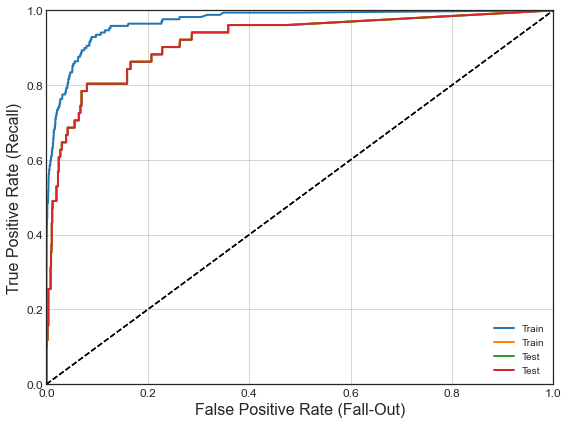

In [86]:
# Then you can plot the FPR against the TPR using Matplotlib
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot(fpr1, tpr1, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.grid(True)            
                                 # Not shown

plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr, tpr,'Train')
plot_roc_curve(fpr1, tpr1,'Test')

#plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") 
#plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  
#plt.plot([4.837e-3], [0.4368], "ro")               
save_fig("roc_curve_plot")                         
plt.legend()  
plt.show()

In [87]:
# tradeoff: the higher the recall (TPR), the more false positives (FPR) the classifier produces. The dotted line represents the 
# ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left 
# corner). One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC
# equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute 
# the ROC AUC

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, pred_prob_train[:,1]))
print(roc_auc_score(y_test, pred_prob_test[:,1]))


0.9703229699082314
0.9191195137613308


Precision/Recall Curve

In [88]:
#Average precision score
from sklearn.metrics import average_precision_score
average_precision_score(y_test, y_pred_prob)

0.5455975254109822

Feature importance scores

In [165]:
# Get numerical feature importances
importances = list(best_gb_model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

''''
The most important predictor using gradient boost is Net Income to Stockholder's Equity Importance whereas random forest 
shows  Persistent EPS in the Last Four Seasons Importance as the most important predictor.

Variable:  Net Income to Stockholder's Equity Importance: 0.19
Variable:  Net Value Growth Rate Importance: 0.12
Variable:  Borrowing dependency Importance: 0.08
Variable:  Interest-bearing debt interest rate Importance: 0.05
Variable:  Non-industry income and expenditure/revenue Importance: 0.04
Variable:  Persistent EPS in the Last Four Seasons Importance: 0.04
Variable:  Cash/Total Assets   Importance: 0.04
Variable:  Net Income to Total Assets Importance: 0.04
Variable:  Interest Expense Ratio Importance: 0.03
Variable:  Working Capital/Equity Importance: 0.03
Variable:  Degree of Financial Leverage (DFL) Importance: 0.03
Variable:  Net Value Per Share (B) Importance: 0.02
Variable:  Quick Ratio         Importance: 0.02
Variable:  Inventory Turnover Rate (times) Importance: 0.02
Variable:  ROA(A) before interest and % after tax Importance: 0.01
Variable:  Continuous interest rate (after tax) Importance: 0.01
Variable:  Research and development expense rate Importance: 0.01
Variable

'\nBelow features have 0 scores and can be eliminated from next run\nVariable:  Tax rate (A)        Importance: 0.0\nVariable:  Cash Flow Per Share Importance: 0.0\nVariable:  Contingent liabilities/Net worth Importance: 0.0\nVariable:  Net Worth Turnover Rate (times) Importance: 0.0\nVariable:  Current Assets/Total Assets Importance: 0.0\nVariable:  Quick Asset Turnover Rate Importance: 0.0\nVariable:  CFO to Assets       Importance: 0.0\nVariable:  Liability-Assets Flag Importance: 0.0\nVariable:  Net Income Flag     Importance: 0.0\n'

F1 Score

In [89]:
from sklearn.metrics import f1_score
print(f1_score(y_test, predicted_test)) # f1 score for test 
print(f1_score(y_train, predicted_train)) # f1 score for train

0.2068965517241379
0.41860465116279066


# Extra Trees

Model training using gridsearch to find best hyperparameters

In [104]:
from sklearn.ensemble import ExtraTreesClassifier

# Define the Extra Trees Classifier
extra_trees = ExtraTreesClassifier()

cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=42)


# Define the parameter grid for GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV
clf = GridSearchCV(estimator=extra_trees, param_grid=param_grid, cv=cv, n_jobs=-1)

# Fit the model to find the best hyperparameters
%time clf.fit(X_train, y_train)


CPU times: user 3.32 s, sys: 324 ms, total: 3.65 s
Wall time: 2min 55s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=42),
             estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

Best parameters

In [105]:
clf.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

Best estimator

In [108]:
# Get the best Random Forest model from the GridSearchCV
best_et_model = clf.best_estimator_

Classification Report

In [109]:
#Classification report for test data 
predicted_test = best_et_model.predict(X_test)
print(classification_report(y_test, predicted_test)) # classification report for test data

#Classification report for train data 
predicted_train = best_et_model.predict(X_train)
print(classification_report(y_train, predicted_train)) # classification report for train data



              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.71      0.10      0.17        51

    accuracy                           0.96      1364
   macro avg       0.84      0.55      0.58      1364
weighted avg       0.96      0.96      0.95      1364

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5286
           1       1.00      0.94      0.97       169

    accuracy                           1.00      5455
   macro avg       1.00      0.97      0.98      5455
weighted avg       1.00      1.00      1.00      5455



Evaluate the model

In [110]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted_test)
print("Accuracy:", accuracy)

Accuracy: 0.9648093841642229


Confusion Matrix

Text(0.5, 257.44, 'Predicted label Train set')

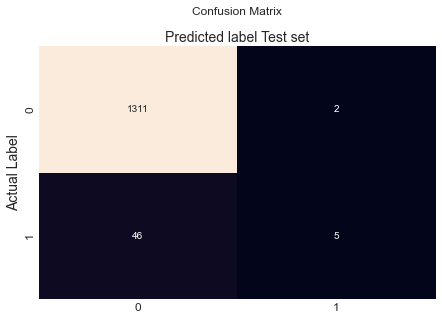

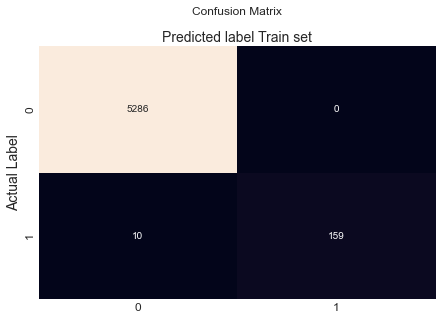

In [111]:
#Plot confusion matrix for test data
import matplotlib.pyplot as plt
import seaborn as sns
import random

test_cnf_matrix = confusion_matrix(y_test, predicted_test) # confusion matrix for test data
train_cnf_matrix = confusion_matrix(y_train, predicted_train) #confusion matrix for train data

labels=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
sns.heatmap(pd.DataFrame(test_cnf_matrix), annot=True,fmt="g", cbar=False)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual Label")
plt.xlabel("Predicted label Test set")

#Plot confusion matrix for train data

labels=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
sns.heatmap(pd.DataFrame(train_cnf_matrix), annot=True,fmt="g", cbar=False)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual Label")
plt.xlabel("Predicted label Train set")

In [112]:
# Accuracy of the positive predictions; this is called the precision of the classifier { TP /[TP+FP]}
# Precision is typically used along with another metric named recall (sensitivity or true positive rate) { TP /[TP+FN]}
from sklearn.metrics import precision_score, recall_score

print("Precision of predictions vs actual on test data is ", round(precision_score(y_test, predicted_test),2)) # test data precision
print("Recall on test data is ", round(recall_score(y_test, predicted_test),2)) # test data recall

print("Precision of predictions vs actual on train data is ", round(precision_score(y_train, predicted_train),2)) #train data precision
print("Recall on train data is ", round(recall_score(y_train, predicted_train),2)) #train data recall

Precision of predictions vs actual on test data is  0.71
Recall on test data is  0.1
Precision of predictions vs actual on train data is  1.0
Recall on train data is  0.94


Roc Curve

In [113]:
# predict probabilities train set
pred_prob_train = best_et_model.predict_proba(X_train)
pred_prob_test= best_et_model.predict_proba(X_test)


In [114]:
# To plot the ROC curve, you first use the roc_curve() function to compute the TPR and FPR for various threshold values:

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, pred_prob_train[:,1])
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_prob_test[:,1])


Saving figure roc_curve_plot


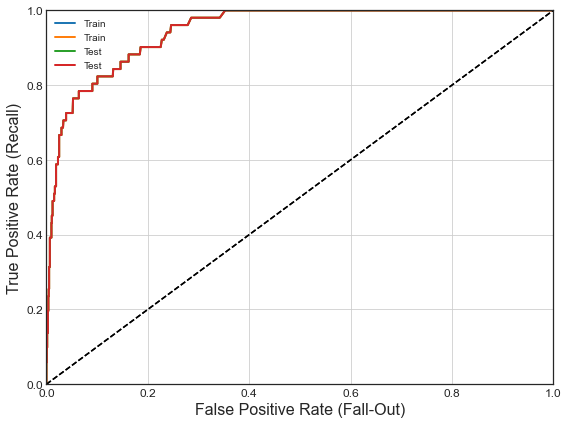

In [115]:
# Then you can plot the FPR against the TPR using Matplotlib
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot(fpr1, tpr1, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.grid(True)            
                                 # Not shown

plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr, tpr,'Train')
plot_roc_curve(fpr1, tpr1,'Test')

#plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") 
#plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  
#plt.plot([4.837e-3], [0.4368], "ro")               
save_fig("roc_curve_plot")                         
plt.legend()  
plt.show()

In [116]:
# tradeoff: the higher the recall (TPR), the more false positives (FPR) the classifier produces. The dotted line represents the 
# ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left 
# corner). One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC
# equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute 
# the ROC AUC

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, pred_prob_train[:,1]))
print(roc_auc_score(y_test, pred_prob_test[:,1]))


1.0
0.9464032376088287


Precision/Recall Curve

In [117]:
#Average precision score
from sklearn.metrics import average_precision_score
average_precision_score(y_test, y_pred_prob)

0.5455975254109822

In [167]:
# Get numerical feature importances
importances = list(best_et_model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable:  Net worth/Assets    Importance: 0.03
Variable:  Net Income to Total Assets Importance: 0.03
Variable:  ROA(C) before interest and depreciation before interest Importance: 0.02
Variable:  ROA(A) before interest and % after tax Importance: 0.02
Variable:  ROA(B) before interest and depreciation after tax Importance: 0.02
Variable:  Net Value Per Share (A) Importance: 0.02
Variable:  Persistent EPS in the Last Four Seasons Importance: 0.02
Variable:  Per Share Net profit before tax (Yuan ¥) Importance: 0.02
Variable:  Debt ratio %        Importance: 0.02
Variable:  Borrowing dependency Importance: 0.02
Variable:  Net profit before tax/Paid-in capital Importance: 0.02
Variable:  Working Capital to Total Assets Importance: 0.02
Variable:  Current Liability to Assets Importance: 0.02
Variable:  Retained Earnings to Total Assets Importance: 0.02
Variable:  Current Liability to Equity Importance: 0.02
Variable:  Net Income to Stockholder's Equity Importance: 0.02
Variable:  Liabilit

F1 Score

In [118]:
from sklearn.metrics import f1_score
print(f1_score(y_test, predicted_test)) # f1 score for test 
print(f1_score(y_train, predicted_train)) # f1 score for train

0.1724137931034483
0.9695121951219512


Model Summary

Performed model training using three classifiction algorithms, namely, Random forest, Gradient boosting and Extra trees classifier. Performed gridsearch to get the best hyperparameter combinations to train the models. Below are the performance metrics of all the three models on the 20% validation set.

Random forest:
    Precision - 64%,
    Recall -  14%,
    F1 score - 22%,

Gradient Boosting:
    Precision - 86%,
    Recall - 12%,
    F1 score - 20%,

Extra Trees:
    Precision - 71%,
    Recall - 10%,
    F1 score - 17%

Overall, random forest seems to provide the best F1 score compared to the other two classifiers. 